## Лабораторная работа №5


In [ ]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

### 1) Создание генераторов

$ F(x) = \frac{x-a}{b-a}$

In [ ]:
#f*(b-a) = (x-a)
#f*(b-a) + a = x
def linear(a=2, b=4.5):
    '''
    Линейное распределение
    выводит случайное число в этом распределении
    '''
    return random.random() * (b-a)+a

def Linear_Data(n):
    x = []
    for i in range (n):
        x.append(linear())
    return x

Linear_Data(10)

[3.4873956171557046,
 2.344217139383675,
 4.078569423717207,
 3.1020331477251353,
 2.526197426258467,
 3.052524803451358,
 3.2348304729057675,
 3.6901743561881872,
 3.9444086509617082,
 3.7051409819215646]

### Гауссовское (Нормальное) распределение

$F(x) = \frac{1}{2} [1 + erf \frac{x - \mu}{\sqrt{2*\sigma^2}}]$

In [ ]:
# (12/n)**(1/2) (чтобы выровнять дисперсию) * (x - n/2 (чтобы выровнять мат ожидание)) 
def gauss(m=2, d=3):
    '''
    Гауссовское распределение
    m - мат ожидание
    d - дисперсия
    выводит случайное число в этом распределении
    '''
    n = 12
    x = 0
    for i in range (n):
         x = x + random.random()
    return d * (12/n)**(1/2) * (x - n/2) + m

def Gauss_Data(n):
    x = []
    for i in range (n):
        x.append(gauss())
    return x

Gauss_Data(2)

[3.2710797572476142,
 0.6904970907552892,
 3.0466813075194086,
 0.7838059714378289,
 0.9599154261771723,
 0.4765934282400144,
 4.139884917171287,
 -2.1284481185479205,
 0.783377906701606,
 5.8109539494210205]

In [ ]:
fib = {1: 1, 2: 1, 3: 2, 4: 3}

print(fib.get(4, 0) + fib.get(7, 5))

8


### Два Пика (2 нормальных распределения с разными параметрами)

In [ ]:
def TwoPeaksData(N,m1=-10,d1=1,m2=10,d2=4):
    x = []
    for i in range(N):
        r = linear()
        if r > 3.125:
            x.append(gauss(m1,d1))
        else:
            x.append(gauss(m2,d2))
    return x

TwoPeaksData(2)

[7.609314161155563, -9.774973887714104]

### 2) Модель Парзена-Розенблатта

In [ ]:
def Gaus_Kern(r): # единственный рабочий без условий (с точностью 0.961)
     return ((2 * math.pi)**(-1/2)) * np.exp(-1/2 * (r**2))
    
def Parz_Rozen(x, data, h):
    re = 0
    for i in data:
        re = re + Gaus_Kern((x - i)/h)
    return re / (len(data)*h)

### 3) Восстановление областей в картинках

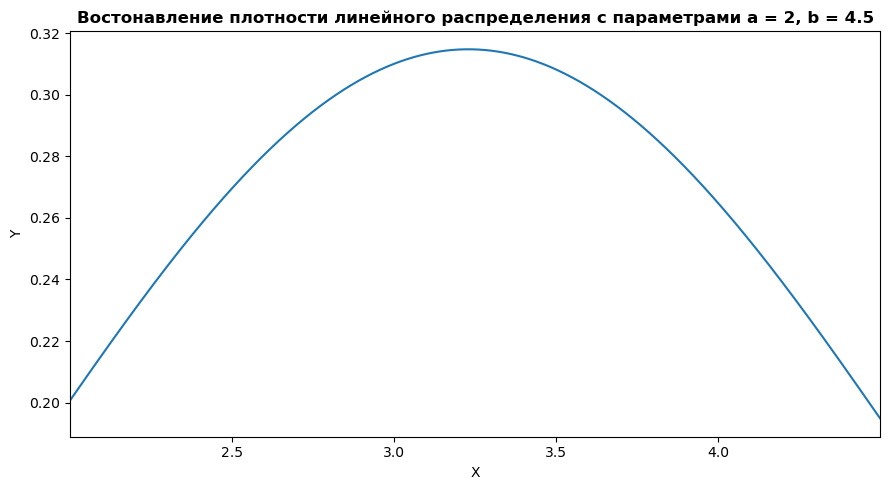

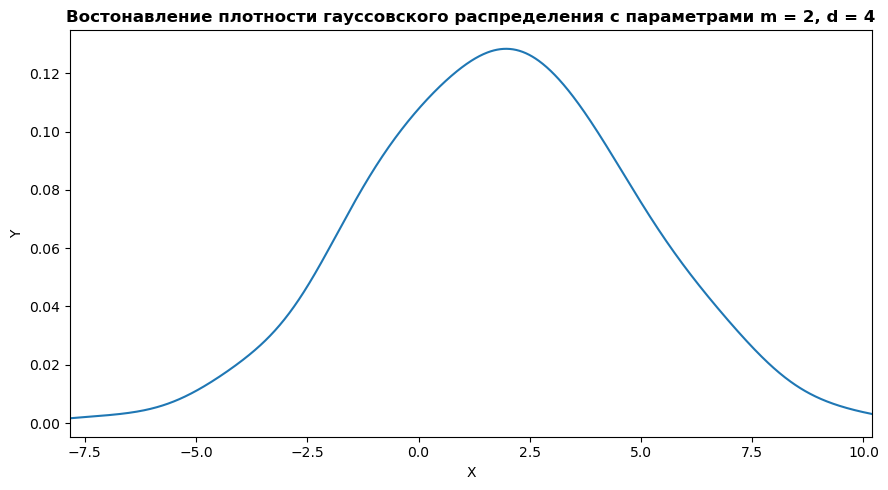

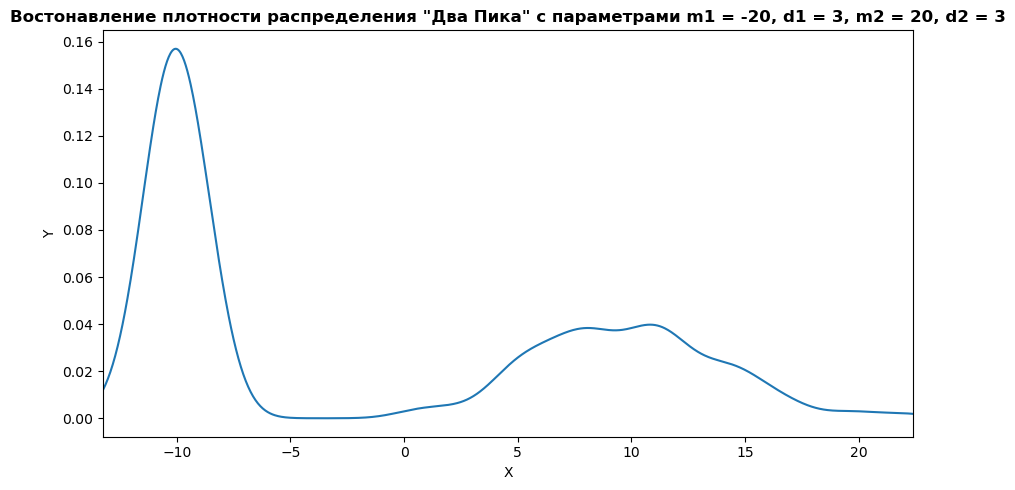

In [ ]:
grid_points = 1000
# Изобразим график 1
lin_dat = Linear_Data(grid_points)
ld_min = min(lin_dat)
ld_max = max(lin_dat)
x = np.linspace(ld_min, ld_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, Parz_Rozen(x, lin_dat, h=1))


# Оформление
ax.set_xlim((ld_min, ld_max))
ax.set_title('Востонавление плотности линейного распределения с параметрами a = 2, b = 4.5', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 2
gau_dat = Gauss_Data(grid_points)
gau_min = min(gau_dat)
gau_max = max(gau_dat)
x = np.linspace(gau_min, gau_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, Parz_Rozen(x, gau_dat, h=1))


# Оформление
ax.set_xlim((gau_min, gau_max))
ax.set_title('Востонавление плотности гауссовского распределения с параметрами m = 2, d = 4', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 3
tp_dat = TwoPeaksData(grid_points)
tp_min = min(tp_dat)
tp_max = max(tp_dat)
x = np.linspace(tp_min, tp_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, Parz_Rozen(x, tp_dat, h=1))


# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = -10, d1 = 1, m2 = 10, d2 = 4', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

### 4) Оптимизация ширины окна одного из наборов методом Leave One Out

$LOO(h) = -\sum_{i = 1}^{l}ln p_h(x_i; X^l/x_i) -> min_h$

In [ ]:
#перебери циклом for наименьшее loo (от 0 до 10)
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(Parz_Rozen(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(tp_dat,h) < loo_min:
        loo_min = LeaveOneOut(lin_dat,h)
        h_min = h
print(f"LOO при стартовом значении h=10: {LeaveOneOut(tp_dat,h)}")

LOO при стартовом значении h=10: 3811.664633746597


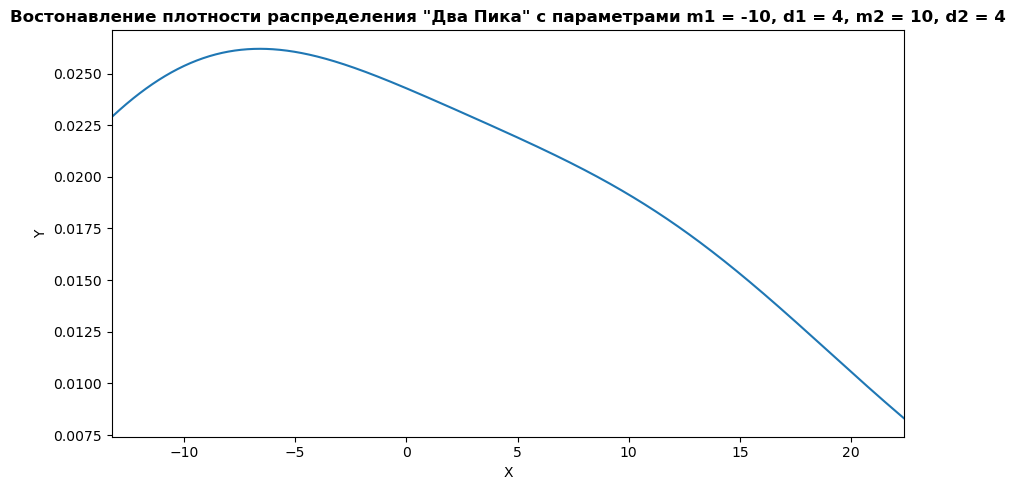

In [ ]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, Parz_Rozen(x, tp_dat, h=10))


# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = -10, d1 = 4, m2 = 10, d2 = 4', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

In [ ]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 1112.0113886933896


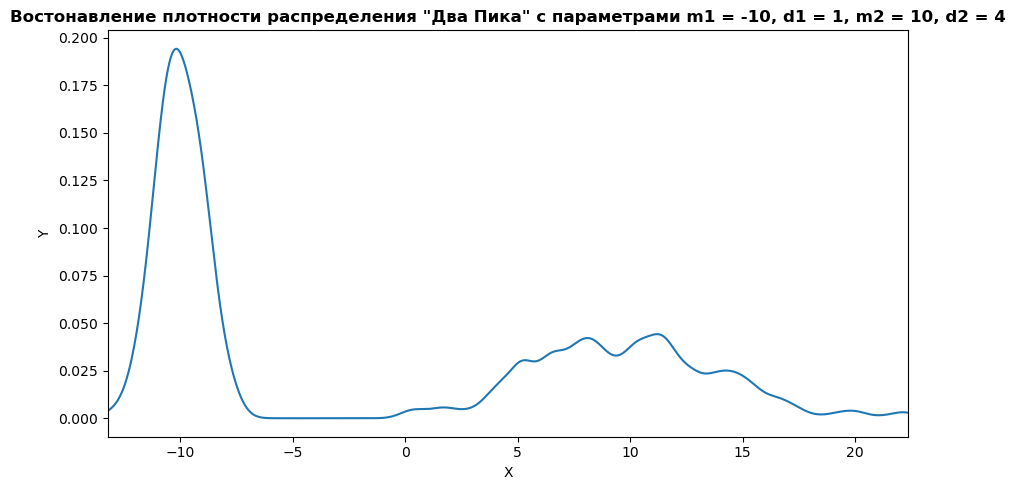

In [ ]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, Parz_Rozen(x, tp_dat, h=h_min))


# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = -10, d1 = 1, m2 = 10, d2 = 4', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

### 5) Два пика - алгоритм из SCIKIT-LEARN

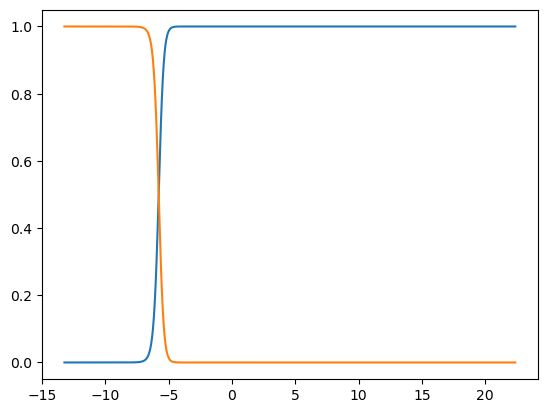

In [ ]:
#Gaussian.mixture - пожалуй, самый ближайший к EM-Алгоритму
from sklearn.mixture import GaussianMixture
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1])
plt.show()